# Sourmash gather result analysis - unweighted_vs_biome plot -L1

> The graph is focusing solely on the average unweighted match percentages along with their standard deviations for each biome type. Each biome type is color-coded for clearer visualization.

> The biome3 column contain hierarchical biome information separated by colons (:). The first part ("level 1") appears to describe the general category (e.g., "Host-associated" or "Environmental"), and the second part ("level 2") specifies a more detailed category (e.g., "Mammals", "Human", "Aquatic").

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/join_2k.csv')
len(data)

1916

In [2]:
data.head()

,accession,ref_f_unweighted,ref_f_weighted,n_matches,biome3
0,DRR014782,0.733621,0.949541,12389,Host-associated:Mammals:Respiratory system
1,DRR014785,0.728105,0.946977,13328,Host-associated:Mammals:Respiratory system
2,DRR019499,0.268765,0.259064,21126,Host-associated:Insecta:Digestive system
3,DRR042462,0.901071,0.965085,3213,Host-associated:Human:Digestive system
4,DRR046069,0.771871,0.839232,1896,Host-associated:Human:Digestive system


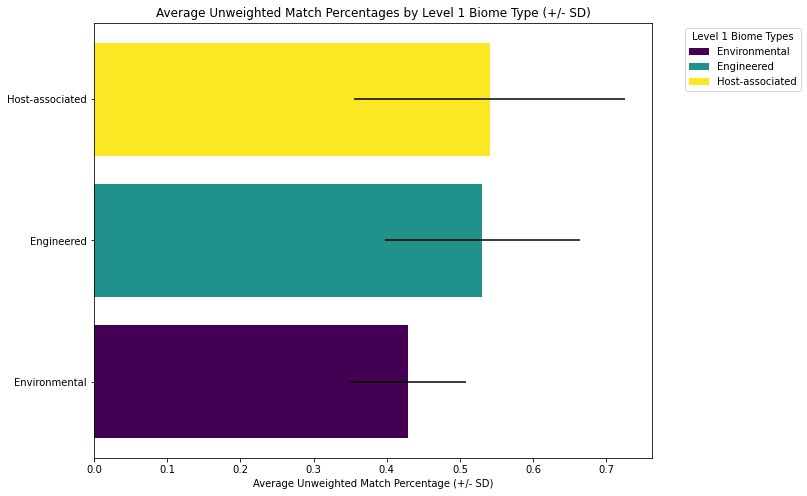

In [4]:
# Extract the level 1 biome from the 'biome3' column
data['level1_biome'] = data['biome3'].apply(lambda x: x.split(':')[0])

# Group the data by the new level 1 biome category and calculate the average and standard deviation for unweighted match percentages
level1_biome_analysis = data.groupby('level1_biome').agg(
    avg_ref_f_unweighted=('ref_f_unweighted', 'mean'),
    std_ref_f_unweighted=('ref_f_unweighted', 'std')
).reset_index()

# Handle missing values for standard deviation
level1_biome_analysis['std_ref_f_unweighted'] = level1_biome_analysis['std_ref_f_unweighted'].fillna(0)

# Sort the data by average unweighted match percentage for visualization
level1_biome_analysis_sorted = level1_biome_analysis.sort_values(by='avg_ref_f_unweighted', ascending=True)

# Create a color map based on the unique level 1 biome types
level1_biome_types = level1_biome_analysis_sorted['level1_biome'].unique()
level1_colors = plt.cm.viridis(np.linspace(0, 1, len(level1_biome_types)))
level1_color_map = dict(zip(level1_biome_types, level1_colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting with color coding and error bars for standard deviation
for biome, color in level1_color_map.items():
    subset = level1_biome_analysis_sorted[level1_biome_analysis_sorted['level1_biome'] == biome]
    ax.barh(subset['level1_biome'], subset['avg_ref_f_unweighted'], xerr=subset['std_ref_f_unweighted'], color=color)

ax.set_xlabel('Average Unweighted Match Percentage (+/- SD)')
ax.set_title('Average Unweighted Match Percentages by Level 1 Biome Type (+/- SD)')
ax.legend(level1_color_map.keys(), title="Level 1 Biome Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
